<a href="https://colab.research.google.com/github/sylviayanz/2023-Predictive-Analytics/blob/main/Titanic_Analysis_Test_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

#Task 2a: Install the Needed Libraries

#Task 2b: Import the Needed Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly
import cufflinks as cf

#Task 3: Load the Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/titanic_test.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [ ]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##Get Data Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##Find Missing Values

In [ ]:
data.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

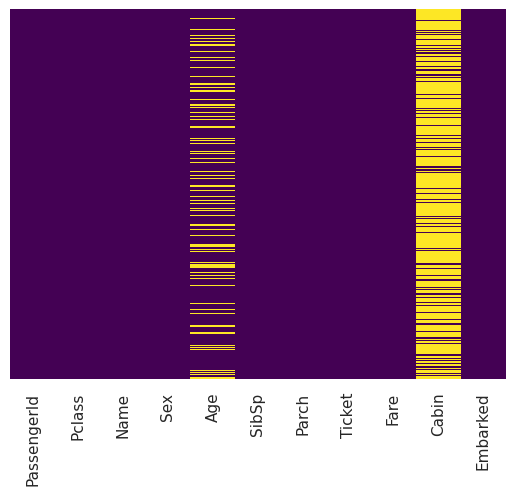

In [ ]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#Task 5: Perform Data Cleaning

<Axes: xlabel='Sex', ylabel='count'>

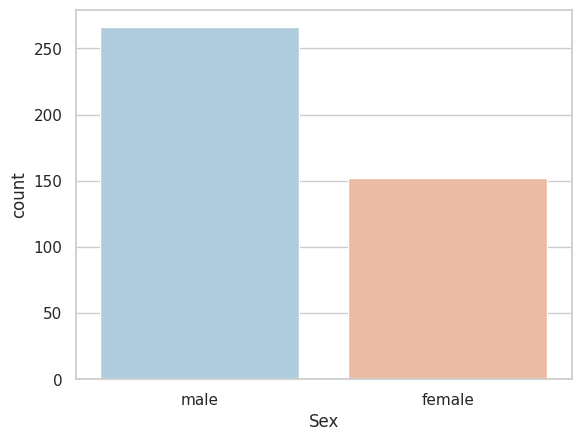

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Sex', data=data, palette='RdBu_r')

<Axes: xlabel='Sex', ylabel='count'>

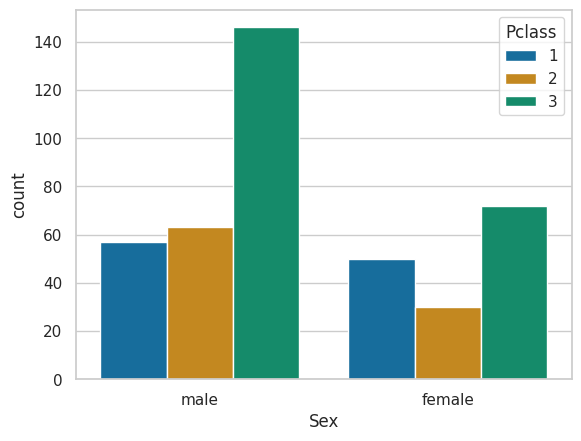

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Sex', hue='Pclass',data=data, palette='colorblind')

<Figure size 1700x1200 with 0 Axes>

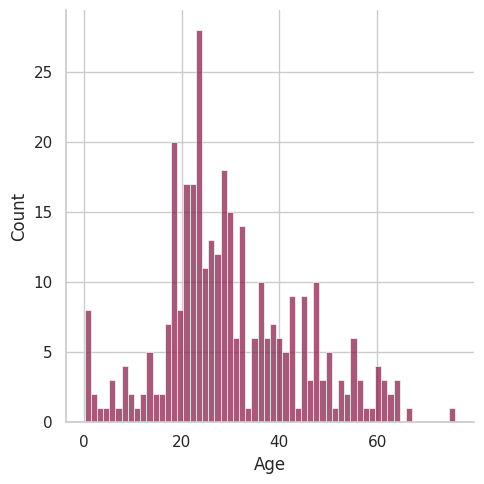

In [ ]:
plt.figure(figsize=(17, 12))
sns.displot(data['Age'].dropna(), kde=False, color='#88224B', bins=60)

<Axes: >

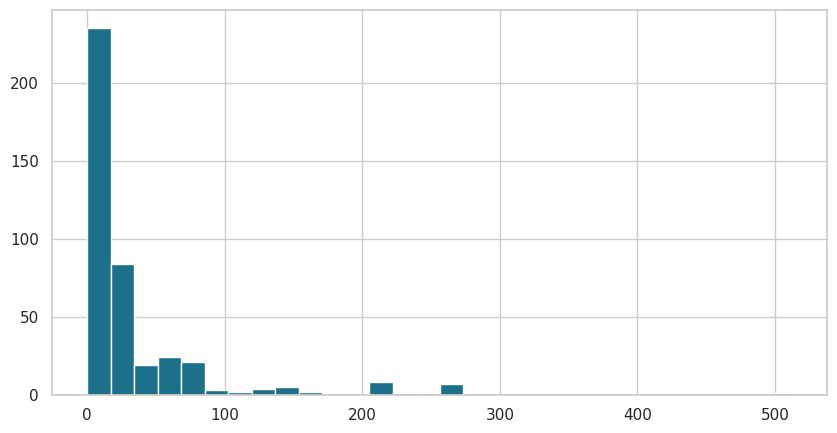

In [ ]:
plt.figure(figsize=(12, 7))
data['Fare'].hist(color='#1C708A', bins=30, figsize=(10,5))

<Axes: xlabel='SibSp', ylabel='count'>

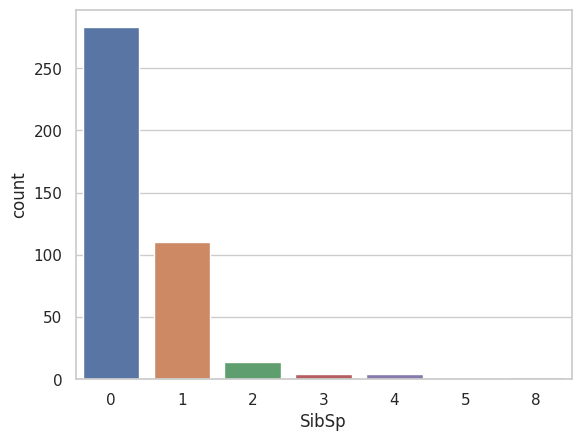

In [ ]:
sns.countplot(x='SibSp', data=data)

#Task 6: Visualize Cleaned up Dataset

In [ ]:
cf.go_offline()

<Axes: xlabel='Pclass', ylabel='Age'>

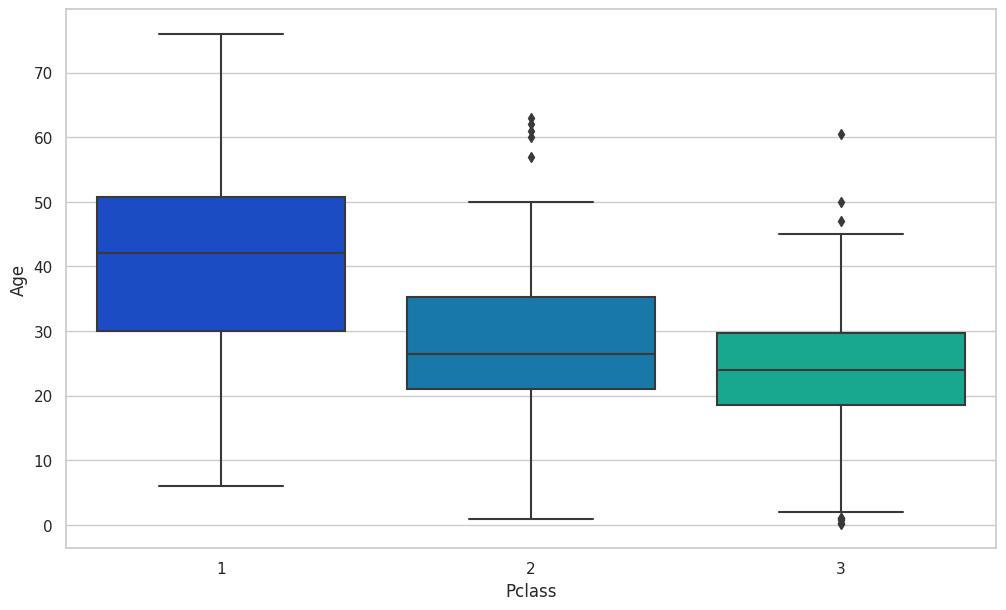

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

In [ ]:
def inpute_age(cols):
  #defining a function to do
  Age = cols[0]

  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:

      return 42
    elif Pclass == 2:
      return 27
    else:
      return 24
  else:
    return Age

<Axes: >

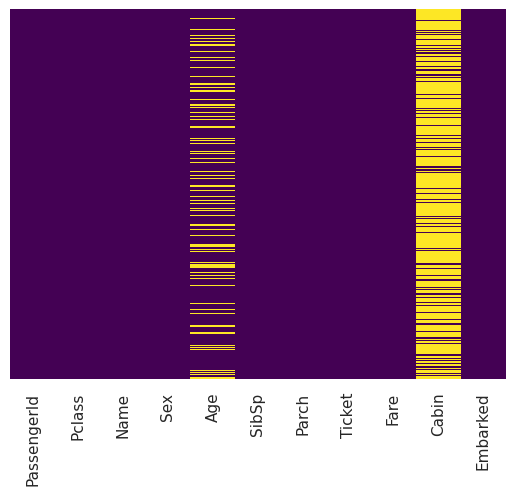

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
data['Age'] = data[['Age', 'Pclass']].apply(inpute_age, axis=1)

<Axes: >

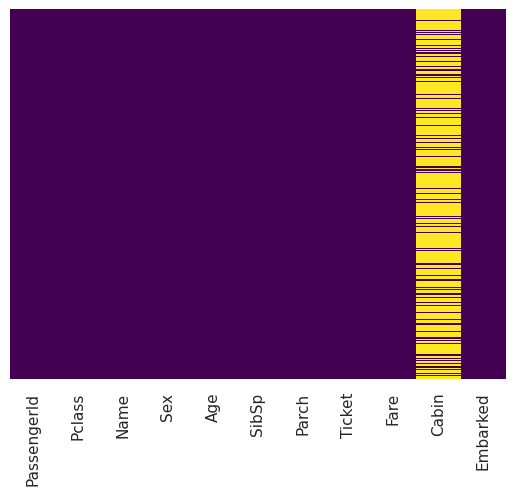

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
data.drop('Cabin', axis=1, inplace=True)

<Axes: >

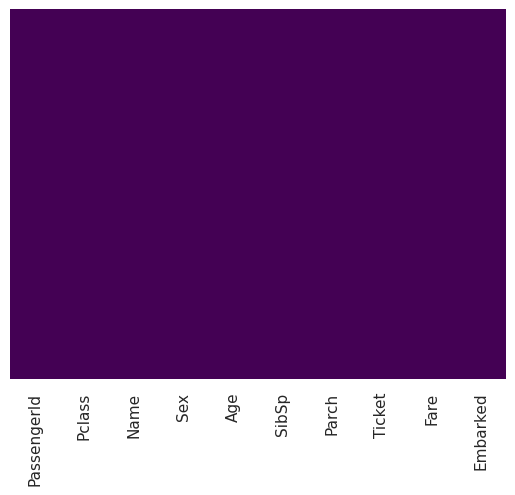

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
data.dropna(subset = ['Fare'], inplace = True)

In [ ]:
data.Fare.isnull().value_counts()

False    417
Name: Fare, dtype: int64

In [ ]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
sex = pd.get_dummies(data['Sex'], drop_first=True)
embark = pd.get_dummies(data['Embarked'], drop_first=True)

In [ ]:
data.drop(['Sex','Embarked', 'Name', 'Ticket' ], axis=1, inplace=True)

In [ ]:
data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [ ]:
data = pd.concat([data, sex, embark], axis=1)

In [ ]:
data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


#Task 7: Conceptualize the problem

In [ ]:
#Let's find out the gender rate!

#Task 8: Perform Data-Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('male',axis=1),
                                                    data['male'], test_size=0.33,
                                                    random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(279, 8)
(138, 8)
(279,)
(138,)


#Task 9: Choose the ML Method to follow

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()


#Task 10: Train the ML Model

In [ ]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

#Task 11: Test the Model

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.61      0.29      0.39        48
           1       0.70      0.90      0.79        90

    accuracy                           0.69       138
   macro avg       0.66      0.60      0.59       138
weighted avg       0.67      0.69      0.65       138



In [ ]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("Male", sum(pp!=0))
print("Female", sum(pp==0))

0.6884057971014492
Male 115
Female 23
